In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/harshita/Documents/Personal/Timeseries analysis/TimeseriesAnalysis/Electric_Production.csv')

# Data cleaning - check for null, missing, duplicates, outliers

In [3]:
df = pd.DataFrame(data)
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
df = df.dropna()

In [5]:
duplicates_count = df.duplicated().sum()

In [6]:
duplicates_count

0

In [7]:
missing_data = df.isnull().sum()

In [8]:
missing_data

DATE          0
IPG2211A2N    0
dtype: int64

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')   


In [10]:
df['IPG2211A2N'] = df['IPG2211A2N'].apply(lambda x: 100 if x > 100 else x)
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,100.0000


In [11]:
df.describe()

,DATE,IPG2211A2N
count,397,397.000000
mean,2001-07-01 13:25:14.357682560,86.736168
min,1985-01-01 00:00:00,55.315100
25%,1993-04-01 00:00:00,77.105200
50%,2001-07-01 00:00:00,89.779500
75%,2009-10-01 00:00:00,100.000000
max,2018-01-01 00:00:00,100.000000
std,NaN,12.613113


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
outliers = df[(df < lower_bound) | (df > upper_bound)]
print(outliers)

    DATE  IPG2211A2N
0    NaT         NaN
1    NaT         NaN
2    NaT         NaN
3    NaT         NaN
4    NaT         NaN
..   ...         ...
392  NaT         NaN
393  NaT         NaN
394  NaT         NaN
395  NaT         NaN
396  NaT         NaN

[397 rows x 2 columns]


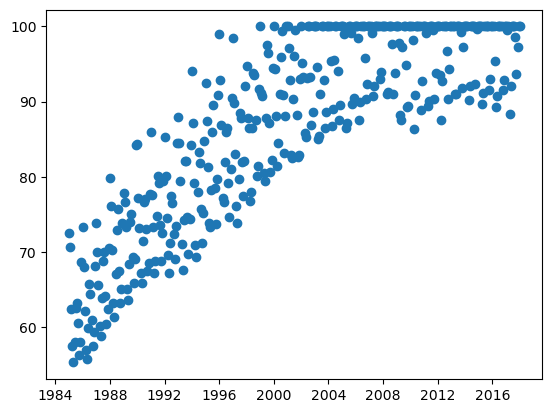

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['DATE'],df['IPG2211A2N'])
plt.show()

# Normalisation - Min max scaling
# Z-Score 
# Max absolute
# Robust

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[[ 'IPG2211A2N']] = scaler.fit_transform(df[['IPG2211A2N']])
print(df)

          DATE  IPG2211A2N
0   1985-01-01    0.384696
1   1985-02-01    0.343671
2   1985-03-01    0.159676
3   1985-04-01    0.048256
4   1985-05-01    0.000000
..         ...         ...
392 2017-09-01    0.969014
393 2017-10-01    0.857081
394 2017-11-01    0.940380
395 2017-12-01    1.000000
396 2018-01-01    1.000000

[397 rows x 2 columns]


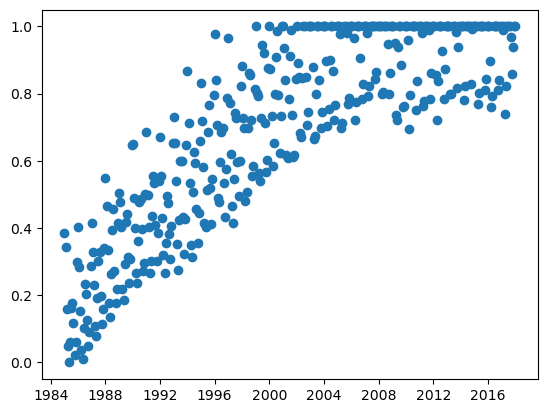

In [18]:
plt.scatter(df['DATE'],df['IPG2211A2N'])
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[[ 'IPG2211A2N']] = scaler.fit_transform(df[['IPG2211A2N']])
df

,DATE,IPG2211A2N
0,1985-01-01,-1.129691
1,1985-02-01,-1.275216
2,1985-03-01,-1.927883
3,1985-04-01,-2.323114
4,1985-05-01,-2.494286
...,...,...
392,2017-09-01,0.943004
393,2017-10-01,0.545956
394,2017-11-01,0.841434
395,2017-12-01,1.052918


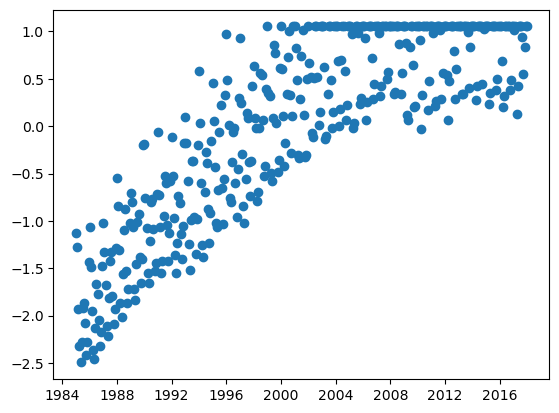

In [22]:
plt.scatter(df['DATE'],df['IPG2211A2N'])
plt.show()

In [25]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df[[ 'IPG2211A2N']] = scaler.fit_transform(df[['IPG2211A2N']])
df

,DATE,IPG2211A2N
0,1985-01-01,-0.452912
1,1985-02-01,-0.511255
2,1985-03-01,-0.772920
3,1985-04-01,-0.931374
4,1985-05-01,-1.000000
...,...,...
392,2017-09-01,0.378066
393,2017-10-01,0.218883
394,2017-11-01,0.337345
395,2017-12-01,0.422132


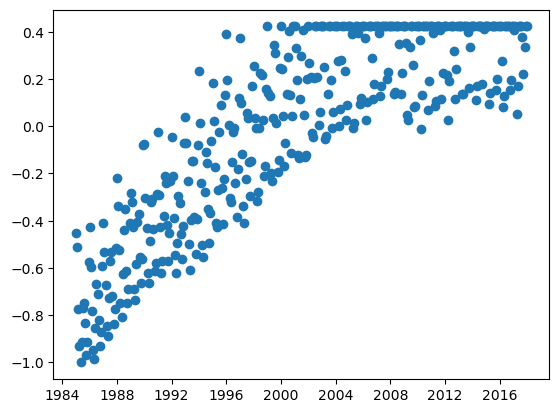

In [26]:
plt.scatter(df['DATE'],df['IPG2211A2N'])
plt.show()

In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[[ 'IPG2211A2N']] = scaler.fit_transform(df[['IPG2211A2N']])
df

,DATE,IPG2211A2N
0,1985-01-01,-0.754508
1,1985-02-01,-0.834578
2,1985-03-01,-1.193690
3,1985-04-01,-1.411154
4,1985-05-01,-1.505337
...,...,...
392,2017-09-01,0.385935
393,2017-10-01,0.167470
394,2017-11-01,0.330049
395,2017-12-01,0.446411


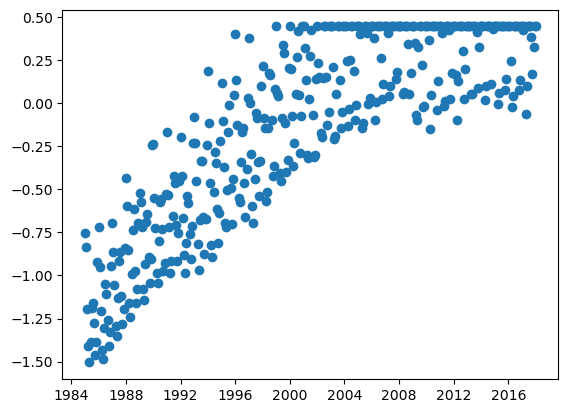

In [31]:
plt.scatter(df['DATE'],df['IPG2211A2N'])
plt.show()